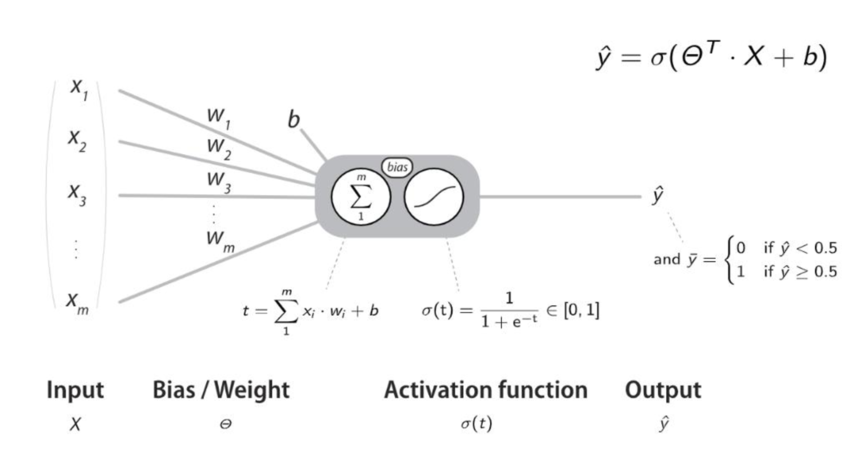

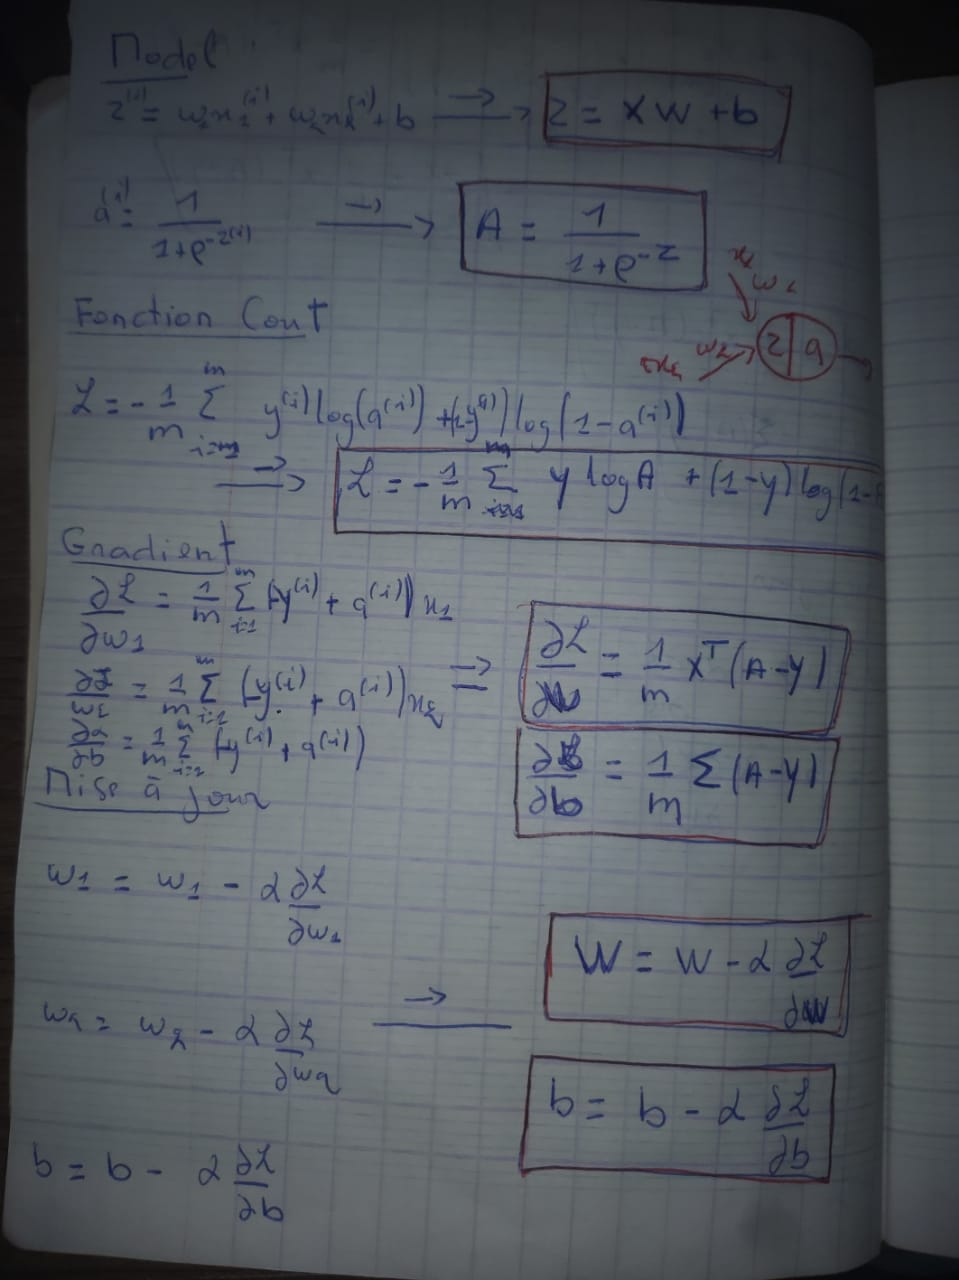

In [142]:
# Je declare que ce code est de moi, et que je n'ai pas copié d'autres personnes.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets   import make_blobs
from sklearn.metrics import accuracy_score

In [143]:
# import numpy as np

# np.random.seed(42)  # Pour la reproductibilité

# # Données aléatoires
# experience_years = np.random.randint(0, 15, size=200)
# projet = np.random.randint(0, 10, size=200)

# # Règle non linéaire : cercle centré en (7, 4) de rayon environ √20 (~4.5)
# # Cela va créer une frontière circulaire non linéaire
# embaucher = np.where((experience_years - 7)**2 + (projet - 4)**2 < 20, 1, 0)

# # Dictionnaire des données
# dat = {
#     'experience_years': experience_years.tolist(),
#     'projet': projet.tolist(),
#     'embaucher': embaucher.tolist()
# }

# # Affichage de 10 exemples
# for i in range(10):
#     print(f"Exp: {dat['experience_years'][i]}, Projet: {dat['projet'][i]}, Embaucher: {dat['embaucher'][i]}")




np.random.seed(42)  # Pour la reproductibilité

experience_years = np.random.randint(0, 15, size=100)  # Expérience entre 0 et 14 ans
projet = np.random.randint(0, 10, size=100)           # Nombre de projets entre 0 et 9

# Règle simple : embaucher si experience + projet > 12, sinon non
embaucher = np.where(experience_years + projet > 12, 1, 0)

dat = {
    'experience_years': experience_years.tolist(),
    'projet': projet.tolist(),
    'embaucher': embaucher.tolist()
}

# Affichage rapide des 10 premiers exemples
for i in range(10):
    print(f"Exp: {dat['experience_years'][i]}, Projet: {dat['projet'][i]}, Embaucher: {dat['embaucher'][i]}")


Exp: 6, Projet: 1, Embaucher: 0
Exp: 3, Projet: 9, Embaucher: 0
Exp: 12, Projet: 3, Embaucher: 1
Exp: 14, Projet: 7, Embaucher: 1
Exp: 10, Projet: 6, Embaucher: 1
Exp: 7, Projet: 8, Embaucher: 1
Exp: 12, Projet: 7, Embaucher: 1
Exp: 4, Projet: 4, Embaucher: 0
Exp: 6, Projet: 1, Embaucher: 0
Exp: 9, Projet: 4, Embaucher: 1


In [144]:
data= pd.DataFrame(dat)
data

,experience_years,projet,embaucher
0,6,1,0
1,3,9,0
2,12,3,1
3,14,7,1
4,10,6,1
...,...,...,...
95,12,7,1
96,14,5,1
97,1,7,0
98,9,8,1


In [145]:
X=data[['experience_years', 'projet']].values
Y=data['embaucher'].values
X.shape,Y.reshape(-1,1).shape

((100, 2), (100, 1))

In [170]:
def model(X, W, b):
    return (np.dot(X, W.T) + b)

def activation_sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def loss(Y, A,m):
    # Pour éviter log(0), on ajoute un petit epsilon
    epsilon = 1e-15
    A = np.clip(A, epsilon, 1 - epsilon)
    return ( (1/m) * np.sum (-Y * np.log(A) - (1 - Y) * np.log(1 - A) ) )

def w_gradient(X, Y, A, m):
    return (1/m) * np.dot(X.T, (A - Y))

def b_gradient(Y, A, m):
    return (1/m) * np.sum(A - Y)

def mise_a_jour(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

def predict(X, W, b):
    Z = model(X, W, b)
    A = activation_sigmoid(Z)
    return np.where(A >= 0.5, 1, 0)

def artificial_neurone(X, Y, W, b, learning_rate=0.1, epochs=200):
    m = X.shape[0]
    cout = []
    accuracy_courbe=[]
    for epoch in range(epochs):

        Z = model(X, W, b)
        A = activation_sigmoid(Z)

        L = loss(Y, A, m)
        cout.append(L)

        dW = w_gradient(X, Y, A, m)
        db = b_gradient(Y, A, m)

        # Mise à jour des paramètres
        W, b = mise_a_jour(W, b, dW, db, learning_rate)
        y_pred = predict(X, W, b)

        # Calcul de l'accuracy 
        accuracy = accuracy_score(Y, y_pred)
        accuracy_courbe.append(accuracy)
        
        # Affichage des résultats tous les 20 epochs
        if epoch % 20 == 0:
            print(f"Epoch {epoch}, Loss: {L}, Accuracy: {accuracy}")
        plt.plot(cout)
        plt.plot(accuracy_courbe)
        
    return W, b


# Avant l'entrainement

Text(0, 0.5, 'Projet')

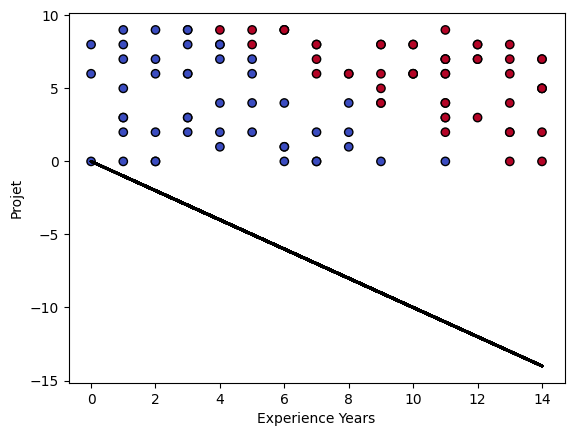

In [171]:
W=np.ones(X.shape[1])
b=0
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
plt.plot(X[:,0], (- W[0] * X[:, 0] - b) / W[1], color='black', linewidth=2, label='Decision Boundary')
plt.xlabel('Experience Years')
plt.ylabel('Projet')

# Apres l'entrainement

Epoch 0, Loss: 3.633987561951521, Accuracy: 0.54
Epoch 20, Loss: 2.2998734725903613, Accuracy: 0.54
Epoch 40, Loss: 1.0631702244986183, Accuracy: 0.54
Epoch 60, Loss: 0.568130656097217, Accuracy: 0.56
Epoch 80, Loss: 0.5450290010725939, Accuracy: 0.67
Epoch 100, Loss: 0.5359222559029915, Accuracy: 0.73
Epoch 120, Loss: 0.5303969390837374, Accuracy: 0.72
Epoch 140, Loss: 0.5263081496851585, Accuracy: 0.74
Epoch 160, Loss: 0.5228304099750313, Accuracy: 0.75
Epoch 180, Loss: 0.5196312871225216, Accuracy: 0.75
Epoch 200, Loss: 0.5165723901586581, Accuracy: 0.79
Epoch 220, Loss: 0.5135946500489991, Accuracy: 0.79
Epoch 240, Loss: 0.51067231945667, Accuracy: 0.78
Epoch 260, Loss: 0.5077939158960556, Accuracy: 0.78
Epoch 280, Loss: 0.5049541427265725, Accuracy: 0.78
Epoch 300, Loss: 0.5021504093624182, Accuracy: 0.79
Epoch 320, Loss: 0.49938131638578986, Accuracy: 0.79
Epoch 340, Loss: 0.49664599144735194, Accuracy: 0.79
Epoch 360, Loss: 0.49394379688422413, Accuracy: 0.8
Epoch 380, Loss: 0.4

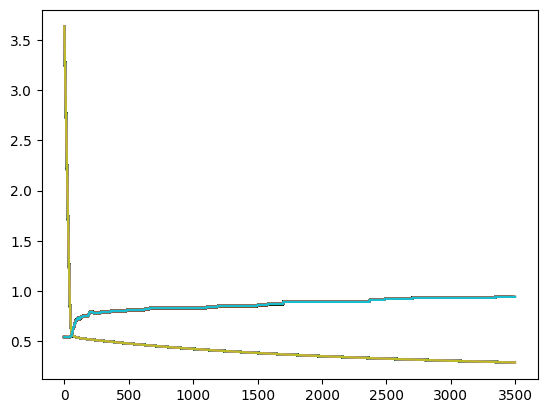

In [172]:
epochs =3500
W, b= artificial_neurone(X, Y, W, b, learning_rate=0.01, epochs=epochs)

Text(0, 0.5, 'Projet')

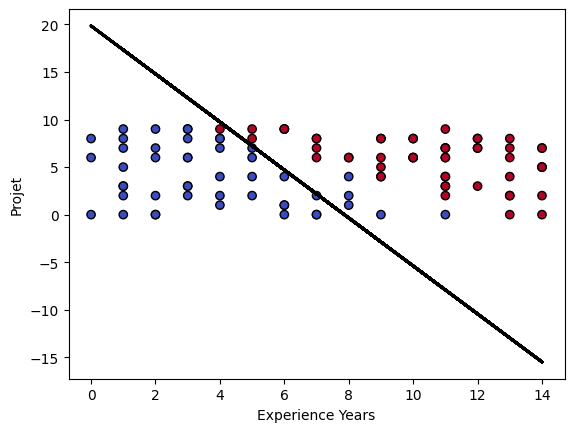

In [173]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
plt.plot(X[:, 0], (-W[0] * X[:, 0] - b) / W[1], color='black', linewidth=2, label='Decision Boundary')
plt.xlabel('Experience Years')
plt.ylabel('Projet')

In [177]:
x=np.array([[2, 2]])
y_pred=predict(x, W, b)
if y_pred==1:
    print("ambaucher")
else:
    print("ne pas embaucher")

ne pas embaucher
